
# Project: Investigate a Dataset - [FBI GUN DATA AND CENSUS DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer 
does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has 12485 rows and 27 colums. 
The data has been supplemented with state level data from census.gov in an exile.  
The NICS data is found in one sheet of an .xlsx file. It contains the number of firearms checks by month, state, and type. 
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have 
one data point per state (2016), but a few have data for more than one year.** 

**FBI Gun Data and the US Census Data are three independent tables. Their common variables include states and it requires data cleaning with removal of nan values and removal of few columns for getting accurate insights.
For the purpose of this project, the FBI gun and the Census data will be analysed to draw some insignts.**

### Question(s) for Analysis

1. **Which states have the highest registered guns from 1998 to 2017?**
2. **What is the overall trend of gun registration over time?** 
3. **Which states have had the highest growth in gun registrations?**
4. **What census data is most associated with high gun per capita?**

In [1]:
# Importing all the important libraries for the Project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\administrator\anaconda3\lib\site-packages\pandas-1.3.4.dist-info\
   from C:\Users\Administrator\anaconda3\Lib\site-packages\~andas-1.3.4.dist-info
  Moving to c:\users\administrator\anaconda3\lib\site-packages\pandas\
   from C:\Users\Administrator\anaconda3\Lib\site-packages\~andas


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Administrator\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Administrator\\AppData\\Local\\Temp\\pip-install-1004bpb_\\pandas_fbf6bb5933134d83995d6c1323f87dc7\\setup.py'"'"'; __file__='"'"'C:\\Users\\Administrator\\AppData\\Local\\Temp\\pip-install-1004bpb_\\pandas_fbf6bb5933134d83995d6c1323f87dc7\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Administrator\AppData\Local\Temp\pip-wheel-ci04m1vt'
       cwd: C:\Users\Administrator\AppData\Local\Temp\pip-install-1004bpb_\pandas_fbf6bb5933134d83995d6c1323f87dc7\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  

  copying pandas\tests\api\__init__.py -> build\lib.win-amd64-3.9\pandas\tests\api
  creating build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\conftest.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\test_datetime64.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\test_numeric.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\test_object.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\test_period.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\test_timedelta64.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  copying pandas\tests\arithmetic\__init__.py -> build\lib.win-amd64-3.9\pandas\tests\arithmetic
  creating build\lib.win-amd64-3.9\pandas\tests\arrays
  copying pandas\tests\arrays\test_array.py -> build\lib.win-amd64-3.9\pandas\tests\arrays
  copyin

  copying pandas\tests\reshape\test_concat.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_cut.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_melt.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_pivot.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_qcut.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_reshape.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_union_categoricals.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\test_util.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  copying pandas\tests\reshape\__init__.py -> build\lib.win-amd64-3.9\pandas\tests\reshape
  creating build\lib.win-amd64-3.9\pandas\tests\scalar
  copying pandas\tests\scalar\test_nat.py -> build\lib.win-amd64-3.9\pandas\tests\scalar
  copying 

    copying pandas\tests\arrays\categorical\test_dtypes.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_indexing.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_missing.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_operators.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_repr.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_sorting.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_subclass.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\test_warnings.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
    copying pandas\tests\arrays\categorical\__i

<a id='wrangling'></a>
## Data Wrangling

In [2]:
%pwd

'C:\\Users\\Administrator'

In [4]:
# Loading the data for Analysis

gun_d= pd.read_excel('gun_data.xlsx')
cen_d= pd.read_csv('U.S. Census Data.csv')
gun_d.head(10)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [5]:
cen_d.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [6]:
gun_d.shape

(12485, 27)

In [7]:
cen_d.shape

(85, 52)

The gun data has 12485 rows and 27 columns whiles the census data has 85rows and 52 columns

In [8]:
#checking for the data types
gun_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [9]:
cen_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

As for census data, numericial types of data was captured as string type, hence there is the need to convert them into float
'Fact' and 'Fact note' column will remain unchanged as their type should be string. 

In [10]:
gun_d.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Entries in the data is inconsistent as some of the columns have missing values. Apart from the following columns: month, state, multiple and totals, the rest have misssing and errant data

In [11]:
cen_d.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

Entries in the Census data is inconsistent as some of the columns have missing values. Again, the data needs to transposed to allow for effective analysis as rows and columns have been interchanged. 

Apart from the following columns: month, state, multiple and totals, the rest have misssing and errant data


### Data Cleaning [Gun Data]


**From the inspection of the structure of the gun data, the following issues will be handled using the underlisted steps.**

1. Filling missing values with the mean of each column for the gun data
2. Convert the month to datetime and extract the year and month. 
3. Clean duplicated data and remove them. 
4. Convert strings and remove useless data


In [12]:
# Filling missing data with mean of each column
gun_d.fillna(gun_d.mean(),inplace = True,axis = 0)
gun_d.head()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/3117559738.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gun_d.fillna(gun_d.mean(),inplace = True,axis = 0)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [13]:
gun_d.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,1165.956364,14.0,2.0,360.471636,8,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,24
12481,1998-11,Washington,1.0,1165.956364,65.0,286.0,360.471636,8,1.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,361
12482,1998-11,West Virginia,3.0,1165.956364,149.0,251.0,360.471636,5,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,408
12483,1998-11,Wisconsin,0.0,1165.956364,25.0,214.0,360.471636,2,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,241
12484,1998-11,Wyoming,8.0,1165.956364,45.0,49.0,360.471636,5,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,107


In [14]:
# Extracting the years from the month colunm  and changing the type to int. 
gun_d['year']=gun_d['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun_d['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [15]:
# Extracting the months from the month column and changing the type to int. 
gun_d['months'] = gun_d['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun_d['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

The data spans from 1998 to 2017 and covers from January to December

In [16]:
# Checking for duplicated data

gun_d.duplicated().sum()

0

The gun data has no duplicates

In [17]:
gun_d.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911,2007.792952,6.484581
std,23729.495816,2736.848174,8611.677589,9302.758891,895.634628,783.185073,604.257419,10.023040,15.130888,0.676584,...,0.172556,33.418596,25.458626,2.096565,0.643964,0.717129,0.181592,32591.418387,5.468296,3.451944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,1.000000
25%,0.000000,1165.956364,868.000000,2079.000000,163.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,4638.000000,2003.000000,3.000000
50%,522.000000,1165.956364,3067.000000,5130.000000,360.471636,125.000000,0.000000,1.000000,3.000000,0.165591,...,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,12399.000000,2008.000000,6.000000
75%,4338.000000,1165.956364,7277.000000,10374.000000,360.471636,301.000000,0.000000,4.828021,7.834156,0.165591,...,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,25453.000000,2013.000000,9.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,2017.000000,12.000000


The average number of guns registered over the period is 21595.73. The range of gun registration is from 0 to 541978.

# Data Cleaning [Census Data]

In [18]:
# Looking at the census data, There is the need to convert the string types to numeric variables
col = cen_d.iloc[:,2:].columns
for c in col:
    cen_d[c] = cen_d[c].str.extract('(\d+)').astype(float)
    
# comfirm changes
cen_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            80 non-null     object 
 1   Fact Note       28 non-null     object 
 2   Alabama         65 non-null     float64
 3   Alaska          64 non-null     float64
 4   Arizona         65 non-null     float64
 5   Arkansas        65 non-null     float64
 6   California      65 non-null     float64
 7   Colorado        65 non-null     float64
 8   Connecticut     65 non-null     float64
 9   Delaware        65 non-null     float64
 10  Florida         65 non-null     float64
 11  Georgia         65 non-null     float64
 12  Hawaii          64 non-null     float64
 13  Idaho           65 non-null     float64
 14  Illinois        65 non-null     float64
 15  Indiana         65 non-null     float64
 16  Iowa            65 non-null     float64
 17  Kansas          65 non-null     float

In [19]:
# Checking and replacing nan values 
cen_d.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            21
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            21
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             21
Maryland          20
Massachusetts     20
Michigan          21
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           21
Virginia     

In [20]:
# Filling the null values 
cen_d.fillna(0.0, inplace=True)
# View changes
cen_d.isnull().any()

Fact              False
Fact Note         False
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina  

In [21]:
#Droppping all the columns that cannot be associated with gun data and reset its index
cen_d1 = cen_d.drop(cen_d.index[65: 85]).reset_index()

# Droping the column 'Fact Note' 
cen_d2 = cen_d1.drop(['Fact Note'], axis =1 )
cen_d2.head(2)

,index,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,"Population estimates, July 1, 2016, (V2016)",4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,1,"Population estimates base, April 1, 2010, (V2...",4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0


In [22]:
#Transpose to foster proper join with gun data
cen_d2.set_index('Fact', inplace=True)

In [23]:
cen_d3 = cen_d2.T.reset_index()

cen_d3.head(2)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
1,Alabama,4.0,4.0,1.0,4.0,6.0,6.0,22.0,23.0,16.0,...,374.0,203.0,137.0,92.0,272.0,41.0,316.0,94.0,50.0,1.0


In [24]:
#Rename index into state
cen_d3.rename(columns={'index':'state'},inplace = True)
cen_d3.head(3)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
1,Alabama,4.0,4.0,1.0,4.0,6.0,6.0,22.0,23.0,16.0,...,374.0,203.0,137.0,92.0,272.0,41.0,316.0,94.0,50.0,1.0
2,Alaska,741.0,710.0,4.0,710.0,7.0,7.0,25.0,26.0,10.0,...,68.0,35.0,22.0,13.0,51.0,7.0,56.0,1.0,570.0,2.0


In [25]:
cen_d3.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
count,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,1.542823e+06,1.496288e+06,2.843137,1.496252e+06,4.372549,4.666667,16.843137,17.666667,11.431373,9.588235,...,1.311278e+05,7.298206e+04,45489.372549,29956.294118,9.767837e+04,12334.705882,1.134707e+05,168.490196,13475.529412,30.000000
std,3.943451e+06,3.856429e+06,3.183536,3.856373e+06,2.560943,2.710474,9.880025,10.327956,6.708964,5.622016,...,3.544713e+05,2.007422e+05,124726.634668,104953.480690,2.495310e+05,30033.773274,3.130259e+05,217.282615,28544.909985,16.360929
min,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,6.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,3.000000e+00,3.000000e+00,0.000000,3.000000e+00,4.000000,5.000000,12.500000,13.500000,9.000000,8.000000,...,1.350000e+02,7.750000e+01,66.000000,19.000000,1.305000e+02,22.000000,1.115000e+02,41.000000,41.000000,17.500000
50%,6.000000e+00,6.000000e+00,2.000000,6.000000e+00,6.000000,6.000000,22.000000,23.000000,15.000000,12.000000,...,4.140000e+02,2.360000e+02,162.000000,74.000000,3.140000e+02,49.000000,3.540000e+02,94.000000,68.000000,30.000000
75%,8.465000e+02,9.430000e+02,5.000000,9.430000e+02,6.000000,6.000000,23.000000,24.000000,16.000000,13.000000,...,8.815000e+02,5.445000e+02,836.500000,648.500000,7.260000e+02,232.500000,7.665000e+02,199.000000,415.500000,43.000000
max,1.974529e+07,1.937811e+07,10.000000,1.937810e+07,8.000000,9.000000,30.000000,31.000000,19.000000,17.000000,...,2.008988e+06,1.139910e+06,725709.000000,709021.000000,1.248304e+06,137532.000000,1.811544e+06,1018.000000,121298.000000,64.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which states have the highest registered guns from 1998 to 2017?)

In [26]:
# Total gun registered for the various states
gun_d1 = gun_d.groupby(['state'])[['totals']].sum().reset_index()


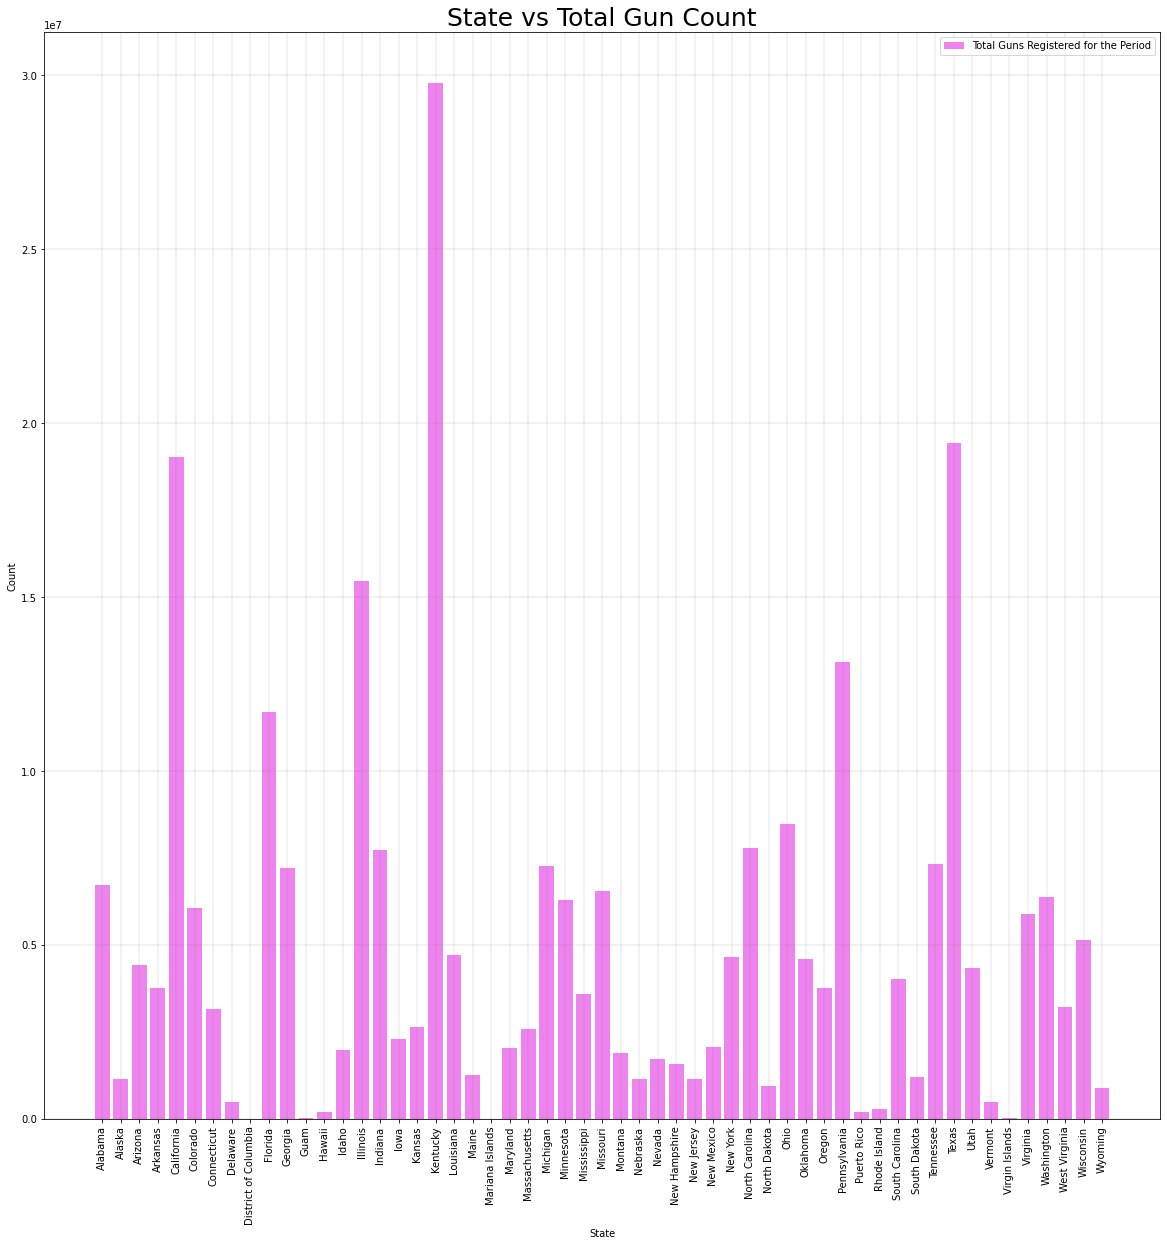

In [27]:
plt.figure(figsize = (20,20))
plt.bar(gun_d1['state'], gun_d1['totals'],label = 'Total Guns Registered for the Period',color ='violet',linewidth= 10)
plt.title('State vs Total Gun Count',fontsize = 25)
plt.xlabel('State',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.grid(color='grey', linestyle='-', linewidth= 0.2)
plt.xticks(gun_d1.state, rotation=90)
plt.legend(fontsize = 10);
#plt.tick_params(axis=gun_d1.state, labelsize= 20)

The figure shows that the state of Kentucky have the highest total gun registration, followed by Texas, Califonia and Illinois

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/1206674349.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gun_d2= gun_d.groupby(gun_d['state'])['totals','permit'].sum().reset_index().plot(figsize = (20,10));


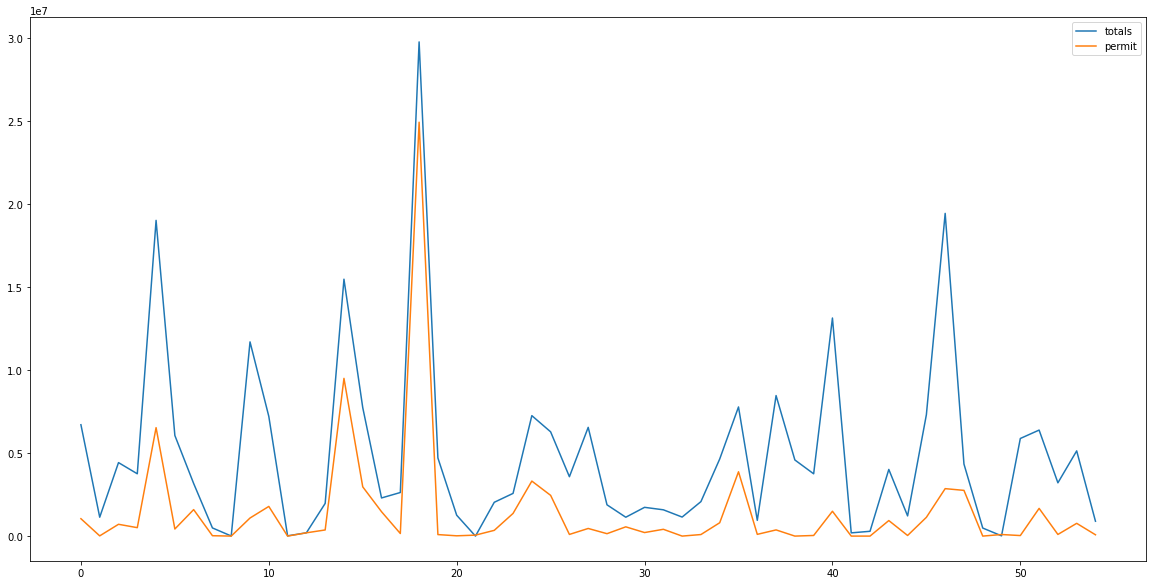

In [28]:
#Finding the state with the higest gun permit and total gun registeration 
gun_d2= gun_d.groupby(gun_d['state'])['totals','permit'].sum().reset_index().plot(figsize = (20,10));

A plot of the total registered guns and guns permit issued depicts a positve relationship. 

In [29]:
#Finding correlations among variables
gun_cor=gun_d.corr()
gun_cor

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
permit,1.000000,-0.000452,0.224369,0.140952,0.096777,0.082326,-0.011036,0.030721,0.008390,0.028925,...,-0.009820,0.004091,0.004110,-0.004249,0.016649,0.006427,0.023768,0.844689,0.187077,-0.020397
permit_recheck,-0.000452,1.000000,0.064579,0.021624,-0.029755,0.028604,-0.000396,-0.014576,-0.008974,-0.016022,...,-0.007184,-0.024591,-0.025411,-0.028103,-0.029757,-0.030242,-0.030779,0.105333,0.000996,0.005325
handgun,0.224369,0.064579,1.000000,0.580547,0.354679,0.372311,0.031359,0.249886,0.121743,0.075884,...,-0.006968,0.052317,0.047034,0.052211,0.054205,0.051906,0.024736,0.644632,0.329050,-0.015011
long_gun,0.140952,0.021624,0.580547,1.000000,0.274803,0.272767,0.039523,0.245275,0.195656,0.046101,...,0.026571,0.045257,0.044507,0.043101,0.052014,0.058252,0.030091,0.577886,0.069026,0.164416
other,0.096777,-0.029755,0.354679,0.274803,1.000000,0.091506,0.000565,0.066516,0.025298,0.046911,...,0.010049,0.081143,0.079604,0.077396,0.063188,0.071891,0.033701,0.279537,0.050388,0.009397
multiple,0.082326,0.028604,0.372311,0.272767,0.091506,1.000000,0.006815,0.174608,0.110150,0.040274,...,-0.006544,0.023815,0.022581,0.026243,0.029893,0.030328,0.023914,0.281083,0.109797,-0.009130
admin,-0.011036,-0.000396,0.031359,0.039523,0.000565,0.006815,1.000000,0.009822,-0.005222,-0.000197,...,-0.000424,-0.000111,-0.000157,-0.000384,0.000469,0.000398,0.000122,0.028494,-0.094003,0.013628
prepawn_handgun,0.030721,-0.014576,0.249886,0.245275,0.066516,0.174608,0.009822,1.000000,0.773853,0.053322,...,-0.005711,0.017652,0.018968,0.023066,0.027167,0.028906,0.036526,0.194029,-0.073736,-0.001767
prepawn_long_gun,0.008390,-0.008974,0.121743,0.195656,0.025298,0.110150,-0.005222,0.773853,1.000000,0.031382,...,-0.002913,0.007416,0.009264,0.011647,0.012524,0.016092,0.016749,0.121973,-0.158061,0.014464
prepawn_other,0.028925,-0.016022,0.075884,0.046101,0.046911,0.040274,-0.000197,0.053322,0.031382,1.000000,...,0.004264,0.054705,0.062613,0.088433,0.047074,0.057841,0.052267,0.060876,0.027434,0.001559


The correlation between permits issued and total registration is strong and positive, this confirming the earlier proposition that as gun permits rises, total registered guns will also increase ceteris paribus. The correlation coefficient is 0.845. 

### Research Question 2  (What is the overall trend of Total Gun Registeration?)

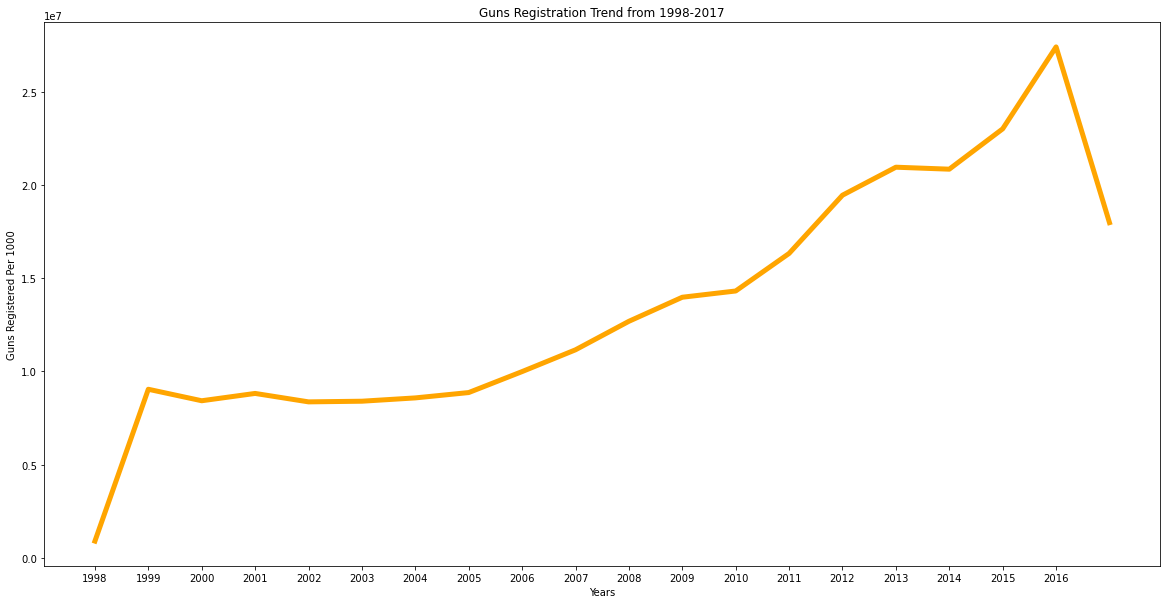

In [30]:
# Plotting the overall trend of Total Gun Registration

plt.figure(figsize=(20,10))

gun_d.groupby(gun_d['year'])['totals'].sum().plot(color ='orange',linewidth= 5)
plt.xlabel('Years')
plt.ylabel('Guns Registered Per 1000')
plt.title('Guns Registration Trend from 1998-2017')

plt.xticks(np.arange(1998,2017));

The trend of total guns registration shows that total gun registration rose sharply from 1998 but began to fall steadily in 1999. However, it begun to rise again steadily from 2000 and peaked in year 2016. The year 2016 saw the highest total gun registration but saw a sharp fall afterwards to 2017.   

### Research Question 3 (Which states have had the highest growth in gun registrations?)

In [31]:
# Generating new subset data for the year 2011 and 2016

gun_2016=gun_d[gun_d['year'] == 2016]  # peak year
gun_2011=gun_d[gun_d['year'] == 2011] # Because of the 9/11

#Group by gun data by state and gun totals for 2011 and 2016 
total_2016= gun_2016.groupby(['state'])['totals'].sum().reset_index()
total_2011= gun_2011.groupby(['state'])['totals'].sum().reset_index()
 
#Rename the dataset to reflect time different
total_2016.rename(columns={'totals':'totals_2016'},inplace = True)
total_2011.rename(columns={'totals':'totals_2011'},inplace = True)

#Merge 2010 and 2016 gun data summary 
total_gun = total_2016.merge(total_2011, on='state', how='inner')

In [32]:
total_gun.head()

,state,totals_2016,totals_2011
0,Alabama,616947,336102
1,Alaska,87647,70198
2,Arizona,416279,251477
3,Arkansas,266014,206228
4,California,2377167,905701


In [33]:
# Finding the increasing percentage of gun registrations from 2010 to 2016

total_gun['h_Gungrowth'] = (total_gun['totals_2016']-total_gun['totals_2011'])/total_gun['totals_2011']


In [34]:
total_gun.head()

,state,totals_2016,totals_2011,h_Gungrowth
0,Alabama,616947,336102,0.835595
1,Alaska,87647,70198,0.248568
2,Arizona,416279,251477,0.655336
3,Arkansas,266014,206228,0.289902
4,California,2377167,905701,1.624671


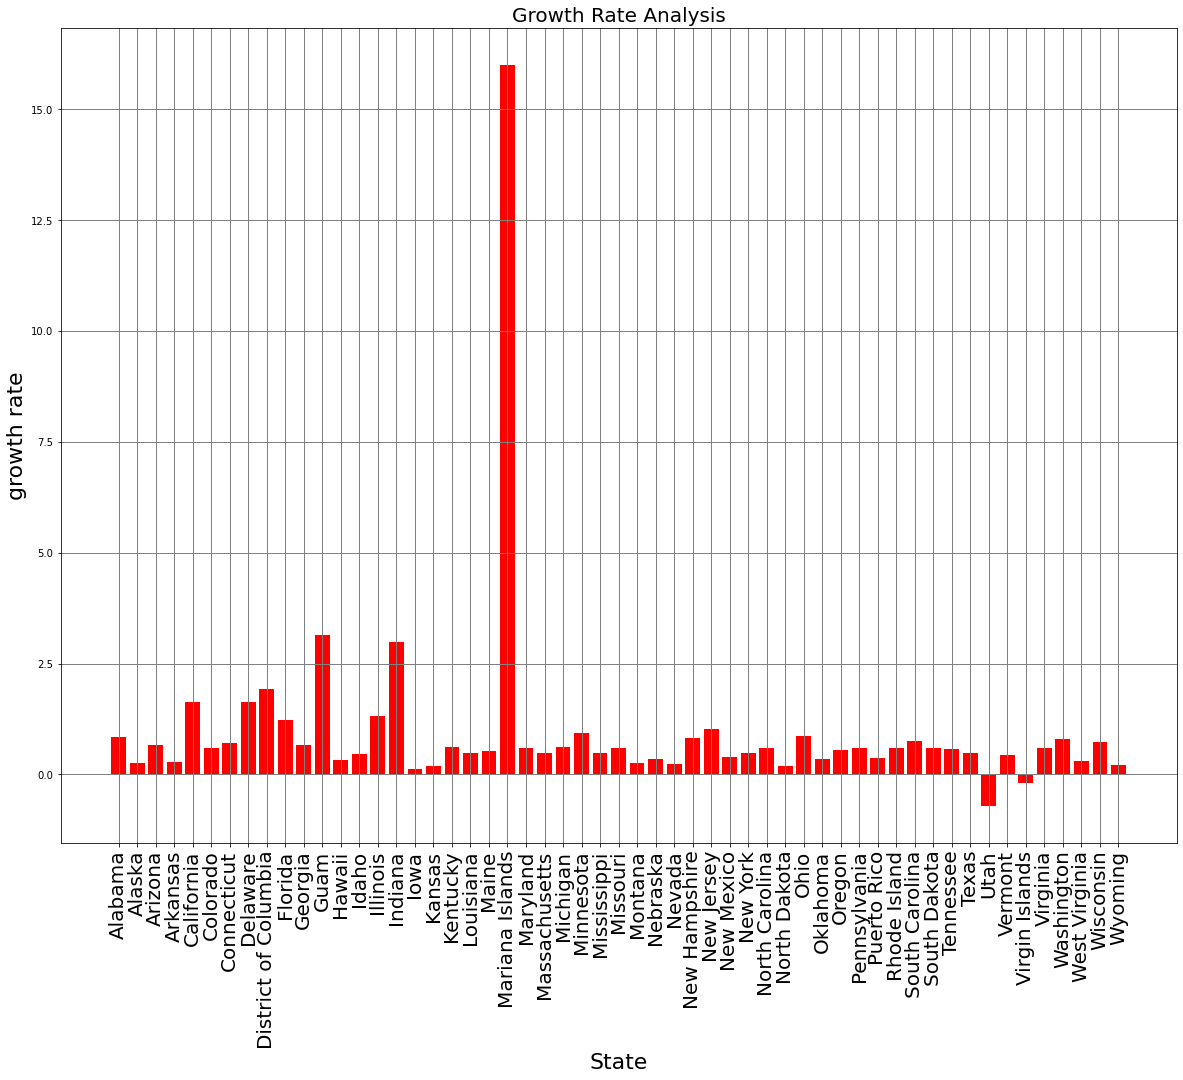

In [35]:
#Plotting a Bar chart for every states'gun growth
plt.figure(figsize = (20,15))
plt.bar(total_gun['state'],total_gun['h_Gungrowth'], color='red')
plt.title('Growth Rate Analysis',fontsize = 20)
plt.xlabel('State',fontsize = 22)
plt.ylabel('growth rate',fontsize = 22)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(total_gun['state'], rotation=90)
plt.tick_params(axis='x', labelsize= 20)

The results shows that the state of Mariana Islands had the highest growth rate, followed by Guam and Indiana. Utah and Virgin Islands had a negative gun growth rate using data for 2011 and 2016. 

## Research Question 4 (What census data can be related with high gun per capita?)

In [36]:
#Change the gun_data months to datetime
gun_d['month']= pd.to_datetime(gun_d['month'])

gun_d.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,9
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,9
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,9


In [37]:
#Generate data for April, 2010
gun_2010 = gun_d[gun_d['month'] == '2010-04-01']

In [38]:
gun_2010.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
4895,2010-04-01,Alabama,396.0,1165.956364,8727.0,8095.0,131.0,394,0.0,8.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,20791,2010,4
4896,2010-04-01,Alaska,0.0,1165.956364,2650.0,3136.0,64.0,135,0.0,10.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,6411,2010,4
4897,2010-04-01,Arizona,1905.0,1165.956364,7787.0,5097.0,198.0,309,0.0,4.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,16578,2010,4


In [39]:
# Generate data for July, 2016
gun_2016 = gun_d[gun_d['month'] == '2016-07-01' ]
gun_2016.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
770,2016-07-01,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.087273,9.0,5.0,0.0,1.0,1.0,0.0,48927,2016,7
771,2016-07-01,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.087273,7.0,17.0,0.0,1.0,0.0,0.0,6793,2016,7
772,2016-07-01,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.087273,13.0,9.0,0.0,0.0,1.0,0.0,34496,2016,7


In [40]:
#Concat or merge April, 2010 and July, 2016 for analysis

gun_merge = pd.concat([gun_2010,gun_2016 ], keys=['2010-04-01', '2016-07-01'], axis = 0)
gun_merge.head(3)

month    state  permit  permit_recheck  handgun  \
2010-04-01 4895 2010-04-01  Alabama   396.0     1165.956364   8727.0   
           4896 2010-04-01   Alaska     0.0     1165.956364   2650.0   
           4897 2010-04-01  Arizona  1905.0     1165.956364   7787.0   

                 long_gun  other  multiple  admin  prepawn_handgun  ...  \
2010-04-01 4895    8095.0  131.0       394    0.0              8.0  ...   
           4896    3136.0   64.0       135    0.0             10.0  ...   
           4897    5097.0  198.0       309    0.0              4.0  ...   

                 rentals_long_gun  private_sale_handgun  \
2010-04-01 4895          0.087273                14.936   
           4896          0.087273                14.936   
           4897          0.087273                14.936   

                 private_sale_long_gun  private_sale_other  \
2010-04-01 4895              11.602909            1.030182   
           4896              11.602909            1.030182   
           4897              11.602909            1.030182   

                 return_to_seller_handgun  return_to_seller_long_gun  \
2010-04-01 4895                   0.40202                   0.441818   
           4896                   0.40202                   0.441818   
           4897                   0.40202                   0.441818   

                 return_to_seller_other  totals  year  months  
2010-04-01 4895                0.105987   20791  2010       4  
           4896                0.105987    6411  2010       4  
           4897                0.105987   16578  2010       4  

[3 rows x 29 columns]

In [41]:
#Reset index for the Merged data
gun_merge.reset_index(drop=True, inplace=True)
gun_merge.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2010-04-01,Alabama,396.0,1165.956364,8727.0,8095.0,131.0,394,0.0,8.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,20791,2010,4
1,2010-04-01,Alaska,0.0,1165.956364,2650.0,3136.0,64.0,135,0.0,10.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,6411,2010,4
2,2010-04-01,Arizona,1905.0,1165.956364,7787.0,5097.0,198.0,309,0.0,4.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,16578,2010,4


In [42]:
# Get the estimated Census data for April,2010 and July, 2016
census_2010 = cen_d3[['state','Population estimates base, April 1, 2010,  (V2016)']]
census_2010.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1.0
1,Alabama,4.0
2,Alaska,710.0
3,Arizona,6.0
4,Arkansas,2.0


In [43]:
#Converting state to float in the census data to creat new tables
census_2010['state']= pd.to_numeric(census_2010['state'], downcast='float', errors='ignore')


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/1298434702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_2010['state']= pd.to_numeric(census_2010['state'], downcast='float', errors='ignore')


In [44]:
#Replace ',' to this '' in the census data. 
census_2010['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
#Convert to float 
census_2010['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(census_2010['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/2400241649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_2010['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(census_2010['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')


In [46]:
census_2010.reset_index(drop = True).head(3)

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1.0
1,Alabama,4.0
2,Alaska,710.0


In [47]:
# Create new datasets for Census data July, 2016
census_2016 = cen_d3[['state', 'Population estimates, July 1, 2016,  (V2016)']] 

In [48]:
#Converting the state data to float
census_2016['state']= pd.to_numeric(census_2016['state'], downcast='float', errors='ignore')

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/159165312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_2016['state']= pd.to_numeric(census_2016['state'], downcast='float', errors='ignore')


In [49]:
#Replace ',' to this '' for July, 2016  
census_2016['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
#Convert to float and ignore the error    
census_2016['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(census_2016['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20868/1429285290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_2016['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(census_2016['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')


In [51]:
# Reset Index for Estimated population July, 2016
census_2016.reset_index(drop = True).head(3)

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0.0
1,Alabama,4.0
2,Alaska,741.0


In [52]:
# Merge the census data April, 2010 and July, 2016
census_merge = census_2010.merge(census_2016, on='state', how='left')
census_merge.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,index,1.0,0.0
1,Alabama,4.0,4.0
2,Alaska,710.0,741.0
3,Arizona,6.0,6.0
4,Arkansas,2.0,2.0


In [53]:
gun_merge.reset_index().head(2)

,index,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,0,2010-04-01,Alabama,396.0,1165.956364,8727.0,8095.0,131.0,394,0.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,20791,2010,4
1,1,2010-04-01,Alaska,0.0,1165.956364,2650.0,3136.0,64.0,135,0.0,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,6411,2010,4


In [54]:
gun_merge1=gun_merge.drop(['months','year','permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [55]:
gun_merge1.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [56]:
# Removing all unecessary states in gun date which is not matching with the census data

gun_merge1 = gun_merge1[gun_merge1.state != 'Guam']
gun_merge1 = gun_merge1[gun_merge1.state != 'Puerto Rico']
gun_merge1 = gun_merge1[gun_merge1.state != 'District of Columbia']
gun_merge1 = gun_merge1[gun_merge1.state != 'Virgin Islands']
gun_merge1 = gun_merge1[gun_merge1.state != 'Mariana Islands']

In [61]:
# Set state as index and check 
gun_merge1.set_index('state', inplace = True)
gun_merge1.head(3)


,month,totals
state,,
Alabama,2010-04-01,20791
Alaska,2010-04-01,6411
Arizona,2010-04-01,16578


In [72]:
# Define a function to Convert into a percentage 
def percent(value):
    if value > 0.001:
        result = value *100
    return result

In [78]:
# Results for gun per capita in 2010 as per analysis

Per_capita_2010 = gun_2010['totals'].sum()/census_merge['Population estimates base, April 1, 2010,  (V2016)'].sum()
Per_capita_2010


0.016075859142996154

In [79]:
# Covert answer to a percentage
percent(Per_capita_2010)

1.6075859142996154

In [80]:
# Checking out gun per capita 2016
Per_capita_2016 = gun_2016['totals'].sum()/census_merge['Population estimates, July 1, 2016,  (V2016)'].sum()
Per_capita_2016


0.027797143571174535

In [81]:
percent(Per_capita_2016)

2.7797143571174536

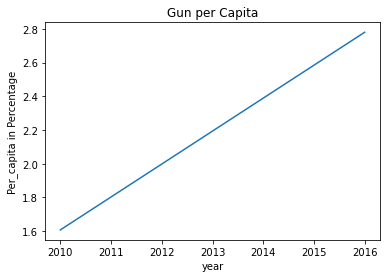

In [84]:
# Plotting the gun Per capita of the data

year = [2010, 2016]
per_capita = [1.6075859142996154, 2.7797143571174536]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('Per_capita in Percentage')
plt.plot(year, per_capita)
plt.show()

The results revealed that the gun per capita in 2010 was 1.6075859142996154% whiles that of 2016 was 2.7797143571174536%. 

<a id='conclusions'></a>
## Conclusions

### Datasets Descriptions :
FBI Gun Data and US Census are two data set in the FBI Gun Data. Data was collected from 1998 to 2017. The analysis was based on the FBI gun data  and the US Census data. Therefore insights were sometimes drawn from both datasets. The common variables include states and it requires data cleaning with removal of nan values and removal of few columns for getting accurate insights.

### Questions to investigate
The following questions were investigated with the FBI gun dataset. 
> Which states have the highest registered guns from 1998 to 2017?
> What is the overall trend of gun registration over time? 
> Which states have had the highest growth in gun registrations?
> What census data can be related with high gun per capita?

### Findings :

Kentucky has the largest count of total gun sales from 1998 to 2017. The next states to follow are Texas, Califonia and illinios. With a suspected link between gun permits issued and the total of guns purchased, the results revealed that this variables have a strong positive correlation with a coefficient of 0.84. This suggest that as more guns are purchased in kentucky, more guns will permits will also be acquired there and visa vis. hence, permit for guns increase as the sale of guns increase in all the states. 

The line plot revealed of gun sales by years 1998 - 2017, there is a general increasing trend of total gun purchases with sharp rise in 1998 to 1999 and the data peaked in year 2016. There is postive trend in gun purchase over the years and 'state' is the most significant variable for comparism.

Again from the reuslts, the numbers of gun registrations have gone up in almost every state except Utah and Virgin Islands. This is generally linked to the positive growth rate found.  Mariana Islands has the largest growth in gun registrations by more than 1500% increase followed by Guam, Indiana and Columbia.

Using both data for analysis by state and date, gun registration per capita in 2010 and 2016 was analyzed. Gun registration per capita in 2010 equal to 1.61%; and that of 2016 was 2.78% gun registration per capita.

### Limitation: 

First and foremost, the presence of missing data and the approached used to fill the missing values in the dataset has affect the results of some variables in the dataset. Additionally, the presence of outliers and not standardized data measurement of the dataset also affected the output and lead to biased results. The gun data was compared to the variables in the US census data to draw conclusions and however some pertinent socio-demographic effects of the Census data on the Gun data could not be captured. 

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1